In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('./data/churn.xls', sheet_name='churn')

In [3]:
df.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code',
       'Phone'],
      dtype='object')

In [4]:
y = df['Churn']
X = df[['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', "Int'l Plan", 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State',]]

In [5]:
X.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK


**Problem:** We need to convert the text column into some numbers.

In [6]:
states = pd.get_dummies(X['State'])

In [7]:
states.shape

(3333, 51)

In [8]:
X.shape

(3333, 18)

In [10]:
X_new = pd.concat([X, states], axis=1) # The safer way would be to use join

In [17]:
#pd.merge(left=X, right=states, left_index=True, right_index=True).head() #equivalent option, safer

In [16]:
#X.join(states).head() #also possible

In [18]:
X_new.drop(columns=['State'], inplace=True) # Remove State column, all the info is elsewhere

In [20]:
X_new.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Int'l Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT',
       'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0, train_size=0.75)

## Decision Trees

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

In [89]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [90]:
from sklearn.tree import plot_tree

[Text(167.4, 181.2, 'X[10] <= 44.805\nsamples = 2499\nvalue = [2131, 368]\nclass = No Churn'),
 Text(83.7, 108.72, 'X[6] <= 3.5\nsamples = 2330\nvalue = [2064, 266]\nclass = No Churn'),
 Text(41.85, 36.23999999999998, 'samples = 2152\nvalue = [1981, 171]\nclass = No Churn'),
 Text(125.55000000000001, 36.23999999999998, 'samples = 178\nvalue = [83, 95]\nclass = Churn'),
 Text(251.10000000000002, 108.72, 'X[8] <= 0.5\nsamples = 169\nvalue = [67, 102]\nclass = Churn'),
 Text(209.25, 36.23999999999998, 'samples = 128\nvalue = [31, 97]\nclass = Churn'),
 Text(292.95, 36.23999999999998, 'samples = 41\nvalue = [36, 5]\nclass = No Churn')]

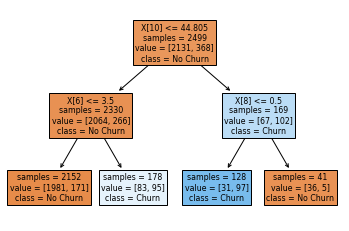

In [97]:
plot_tree(tree, 
          impurity=False, 
          proportion=False,
          filled=True, 
          class_names=['No Churn','Churn'])

In [62]:
tree.score(X_train, y_train)

0.9531812725090036

In [63]:
tree.score(X_test, y_test)

0.9424460431654677

**Question:** How can we find a good value for the `max_depth` parameter?

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {'max_depth':[2,4,6,8,10]}

In [71]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42)
                    , param_grid=param_grid
                    , cv=5 # 5 = prototype, 10 = high confidence
                   )

In [72]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
     

In [73]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009526,0.006320,0.000000,0.000000,2,{'max_depth': 2},0.884232,0.888,0.882,0.877756,0.887776,0.883954,0.003827,5
1,0.012504,0.006252,0.000000,0.000000,4,{'max_depth': 4},0.916168,0.914,0.914,0.923848,0.915832,0.916767,0.003650,4
2,0.015622,0.000020,0.000000,0.000000,6,{'max_depth': 6},0.940120,0.936,0.936,0.939880,0.919840,0.934374,0.007477,1
3,0.015630,0.000017,0.000000,0.000000,8,{'max_depth': 8},0.930140,0.936,0.946,0.935872,0.915832,0.932773,0.009885,2
4,0.018746,0.006249,0.003124,0.006249,10,{'max_depth': 10},0.928144,0.930,0.940,0.937876,0.909820,0.929172,0.010664,3


In [76]:
my_best_model = grid.best_estimator_

## Model persistence

**Option 1:**

In [77]:
from joblib import dump

In [78]:
dump(my_best_model, 'tree.joblib')

['tree.joblib']

**Option 2:**

In [79]:
import pickle

In [81]:
pickle.dump(my_best_model, open('tree.pkl','wb'))

## Exporting the tree to graphviz

In [82]:
from sklearn.tree import export_graphviz

In [98]:
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=X_new.columns, 
                impurity=False, 
                proportion=False,
                filled=True, 
                class_names=['No Churn','Churn']
               )

Then go to www.webgraphviz.com and copy/paste the content of this file.

In [99]:
y_pred = my_best_model.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
confusion_matrix(y_test, y_pred)

array([[695,  24],
       [ 31,  84]], dtype=int64)

In [103]:
X_test.iloc[0,:].values

array([ 92.  ,   0.  , 264.3 , 160.9 , 198.6 ,   9.3 ,   0.  ,   1.  ,
         0.  ,  91.  ,  44.93, 115.  ,  13.68,  73.  ,   8.94,   5.  ,
         2.51,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ])

In [105]:
X_test.iloc[0,:15]

Account Length     92.00
VMail Message       0.00
Day Mins          264.30
Eve Mins          160.90
Night Mins        198.60
Intl Mins           9.30
CustServ Calls      0.00
Int'l Plan          1.00
VMail Plan          0.00
Day Calls          91.00
Day Charge         44.93
Eve Calls         115.00
Eve Charge         13.68
Night Calls        73.00
Night Charge        8.94
Name: 405, dtype: float64

In [106]:
X_new.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Int'l Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT',
       'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [108]:
X_new.to_csv('train_set.csv', index=None)